In [17]:
from source.report.report_utils import preprocess_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load the data and hyperparameters
episodes, config = preprocess_results('quantumCartPole-v1')

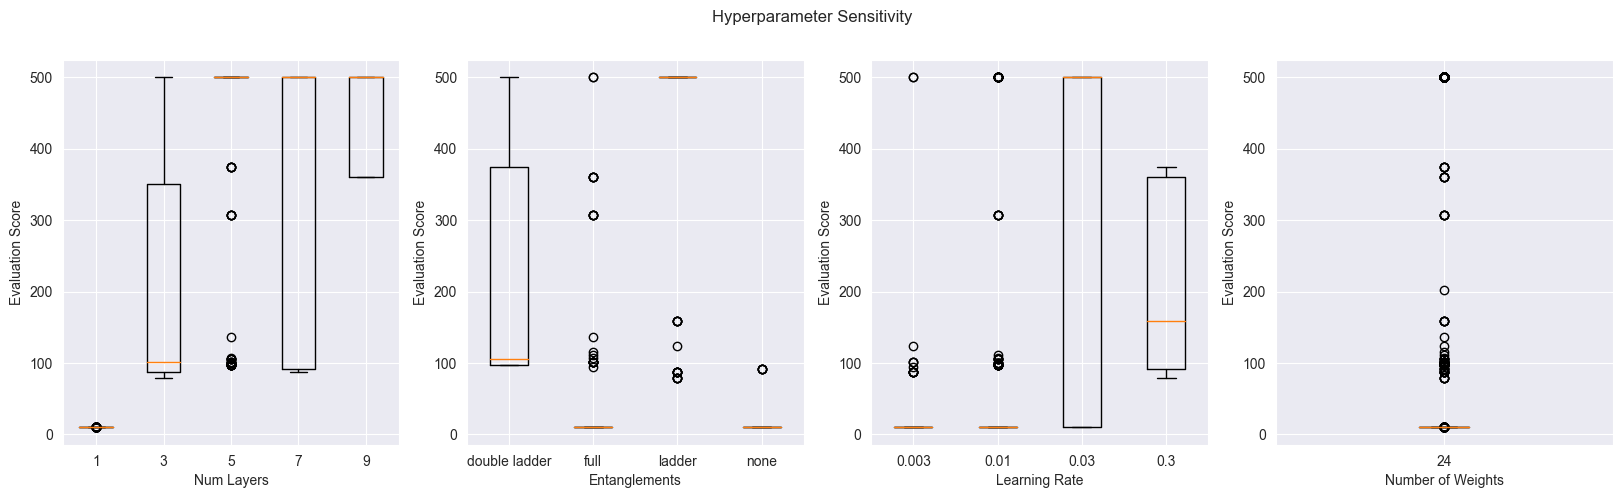

In [25]:
import numpy as np

best_episodes = episodes.groupby(['trial_id']).agg({'evaluation_score': 'max'}).reset_index()

best_episodes = pd.merge(best_episodes, episodes, on=['trial_id', 'evaluation_score'], how='left')

# Create box plots for each hyperparameter configuration
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('Hyperparameter Sensitivity')

layer_values = np.sort(episodes['layers'].unique())
axs[0].boxplot(
    [best_episodes[best_episodes['layers'] == l]['evaluation_score'] for l in layer_values])
axs[0].set_xticklabels(layer_values)
axs[0].set_xlabel('Num Layers')
axs[0].set_ylabel('Evaluation Score')

entanglement_values = np.sort(episodes['entanglements'].unique())
axs[1].boxplot([best_episodes[best_episodes['entanglements'] == n]['evaluation_score'] for n in
                entanglement_values])
axs[1].set_xticklabels(entanglement_values)
axs[1].set_xlabel('Entanglements')
axs[1].set_ylabel('Evaluation Score')

lr_values = np.sort(episodes['learning_rate'].unique())
axs[2].boxplot([best_episodes[best_episodes['learning_rate'] == lr]['evaluation_score'] for lr in
                lr_values])
axs[2].set_xticklabels(lr_values)
axs[2].set_xlabel('Learning Rate')
axs[2].set_ylabel('Evaluation Score')

# Create a boxplot for number of weights
n_weights_values = np.sort(episodes['n_weights'].unique())
axs[3].boxplot([best_episodes[best_episodes['n_weights'] == nw]['evaluation_score'] for nw in n_weights_values])
axs[3].set_xticklabels(n_weights_values)
axs[3].set_xlabel('Number of Weights')
axs[3].set_ylabel('Evaluation Score')

plt.show()


Text(0.5, 1.0, 'Evaluation Score Heatmap for Layers and Nodes')

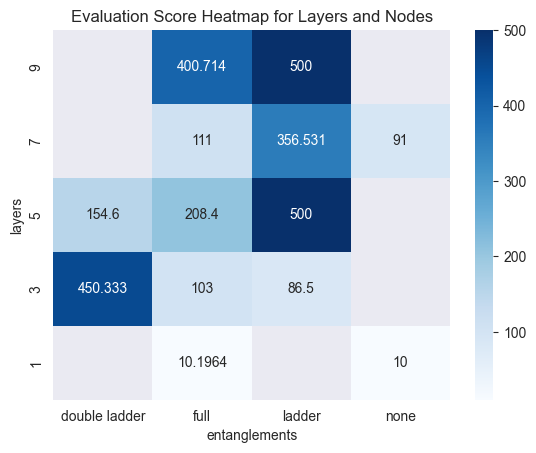

In [19]:
# Create a pivot table to aggregate the evaluation score by layers and neurons
layers_nodes = best_episodes.pivot_table(index='layers', columns='entanglements', values='evaluation_score',
                                         aggfunc='mean')

# Create a heatmap for layers and neurons
sns.heatmap(layers_nodes, annot=True, cmap='Blues', fmt='g').invert_yaxis()
plt.title('Evaluation Score Heatmap for Layers and Nodes')

Text(0.5, 1.0, 'Evaluation Score Heatmap for Layers and Learning Rate')

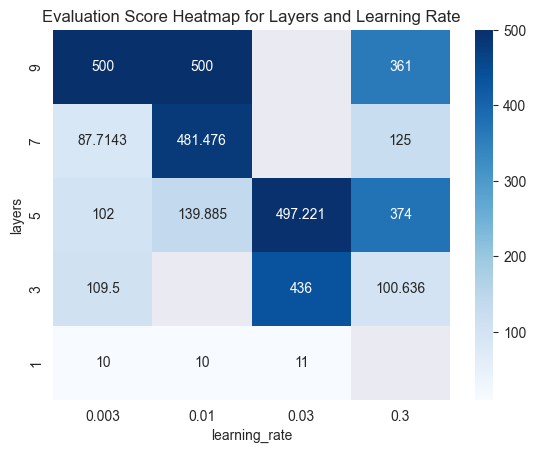

In [20]:
# Create a pivot table to aggregate the evaluation score by layers and learning rate
layers_lr = best_episodes.pivot_table(index='layers', columns='learning_rate', values='evaluation_score',
                                      aggfunc='mean')

# Create a heatmap for layers and learning rate
sns.heatmap(layers_lr, annot=True, cmap='Blues', fmt='g').invert_yaxis()
plt.title('Evaluation Score Heatmap for Layers and Learning Rate')

Text(0.5, 1.0, 'Evaluation Score Heatmap for Learning Rate and Nodes')

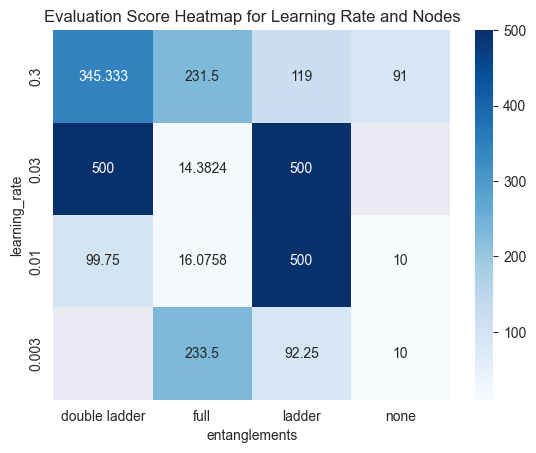

In [21]:
# Create a pivot table to aggregate the evaluation score by learning rate and nodes
lr_nodes = best_episodes.pivot_table(index='learning_rate', columns='entanglements', values='evaluation_score',
                                     aggfunc='mean')

# Create a heatmap for learning rate and nodes
sns.heatmap(lr_nodes, annot=True, cmap='Blues', fmt='g').invert_yaxis()
plt.title('Evaluation Score Heatmap for Learning Rate and Nodes')


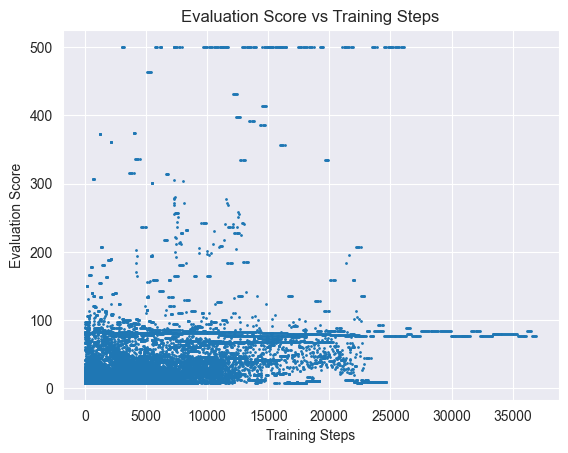

In [22]:
# plot best evaluation score against training_steps_cumsum
plt.scatter(episodes['training_steps_cumsum'], episodes['evaluation_score'], s=1)
plt.xlabel('Training Steps')
plt.ylabel('Evaluation Score')
plt.title('Evaluation Score vs Training Steps')
plt.show()


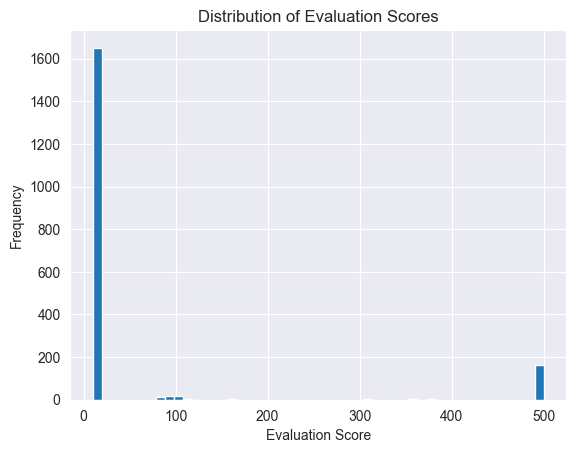

In [23]:
import matplotlib.pyplot as plt

# Create a histogram of evaluation scores
plt.hist(best_episodes['evaluation_score'], bins=50)
plt.xlabel('Evaluation Score')
plt.ylabel('Frequency')
plt.title('Distribution of Evaluation Scores')
plt.show()


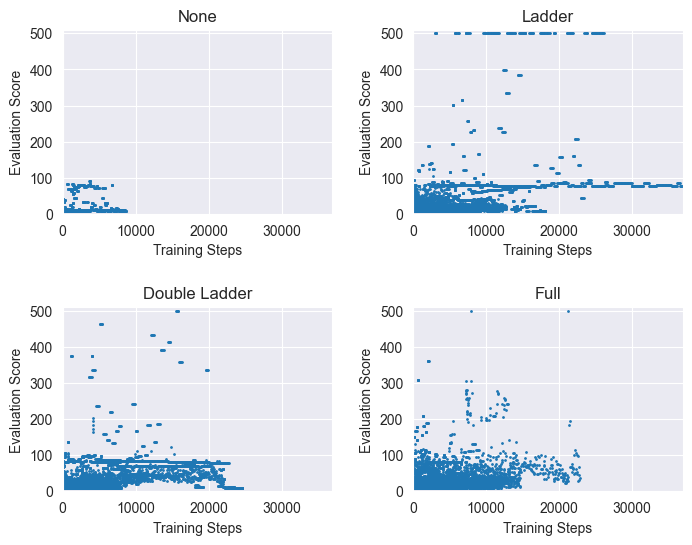

In [24]:
import matplotlib.pyplot as plt

# Define a figure and axis for the subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

# Set the same x-axis and y-axis limits for all subplots
x_min = episodes['training_steps_cumsum'].min()
x_max = episodes['training_steps_cumsum'].max()
y_min = episodes['evaluation_score'].min()
y_max = episodes['evaluation_score'].max()
for ax in axs.flatten():
    ax.set_xlim(x_min - 10, x_max + 10)
    ax.set_ylim(y_min - 10, y_max + 10)

# Plot the first scatter plot on the first subplot
scatter_none = episodes[episodes['entanglements'] == 'none']
axs[0, 0].scatter(scatter_none['training_steps_cumsum'], scatter_none['evaluation_score'], s=1)
axs[0, 0].set_xlabel('Training Steps')
axs[0, 0].set_ylabel('Evaluation Score')
axs[0, 0].set_title('None')

# Plot the second scatter plot on the second subplot
scatter_ladder = episodes[episodes['entanglements'] == 'ladder']
axs[0, 1].scatter(scatter_ladder['training_steps_cumsum'], scatter_ladder['evaluation_score'], s=1)
axs[0, 1].set_xlabel('Training Steps')
axs[0, 1].set_ylabel('Evaluation Score')
axs[0, 1].set_title('Ladder')

# Plot the third scatter plot on the third subplot
scatter_double_ladder = episodes[episodes['entanglements'] == 'double ladder']
axs[1, 0].scatter(scatter_double_ladder['training_steps_cumsum'], scatter_double_ladder['evaluation_score'], s=1)
axs[1, 0].set_xlabel('Training Steps')
axs[1, 0].set_ylabel('Evaluation Score')
axs[1, 0].set_title('Double Ladder')

# Plot the fourth scatter plot on the fourth subplot
scatter_full = episodes[episodes['entanglements'] == 'full']
axs[1, 1].scatter(scatter_full['training_steps_cumsum'], scatter_full['evaluation_score'], s=1)
axs[1, 1].set_xlabel('Training Steps')
axs[1, 1].set_ylabel('Evaluation Score')
axs[1, 1].set_title('Full')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()
